# Importing Libraries 

In [1]:
import pandas as pd 
import tensorflow as tf 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns

2025-04-14 18:09:21.873132: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 18:09:21.875325: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-14 18:09:21.882167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744636161.894855   43805 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744636161.898301   43805 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 18:09:21.910423: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
df["Target"] = data.target

In [4]:
X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7987,3.0700,39.0,4.280000,1.001905,1670.0,3.180952,33.85,-118.17
16511,3.4009,22.0,6.214834,1.066496,1292.0,3.304348,37.76,-121.25
6894,5.9941,23.0,6.495274,1.068053,1729.0,3.268431,34.05,-118.11
7036,4.0096,35.0,5.436693,1.031008,1659.0,4.286822,33.96,-118.08
2806,4.0125,29.0,5.720268,1.056951,1527.0,2.557789,35.44,-119.02
...,...,...,...,...,...,...,...,...
5913,3.1588,30.0,4.069825,1.000000,1357.0,3.384040,34.29,-118.44
17939,3.7321,41.0,4.586354,1.008529,1092.0,2.328358,37.34,-121.94
16288,2.4667,21.0,5.118421,1.032895,1140.0,3.750000,37.93,-121.31
17734,4.8173,16.0,6.121622,1.006757,605.0,4.087838,37.30,-121.80


In [11]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape = (X_train.shape[1],))])
model.compile(optimizer='adam', loss='mse')

/home/shuaib/anaconda3/envs/myenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 1083330.3750
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 180244.2969
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 24268.0996
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 10792.7178
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 7562.0220
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 4766.1558
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 2836.4929
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 1345.5651
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 558.6652
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 174.6571
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 45.2217
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 29.9164
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 10.7440
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 582

In [13]:
y_pred = model.predict(X_test).flatten()
y_pred

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step


array([0.84800136, 1.4253145 , 2.3471665 , ..., 4.054236  , 1.3922182 ,
       1.7693278 ], dtype=float32)

In [14]:
loss = model.evaluate(X_test, y_test, verbose=8)
print("MSE on test data:", loss)

MSE on test data: 0.6689479351043701


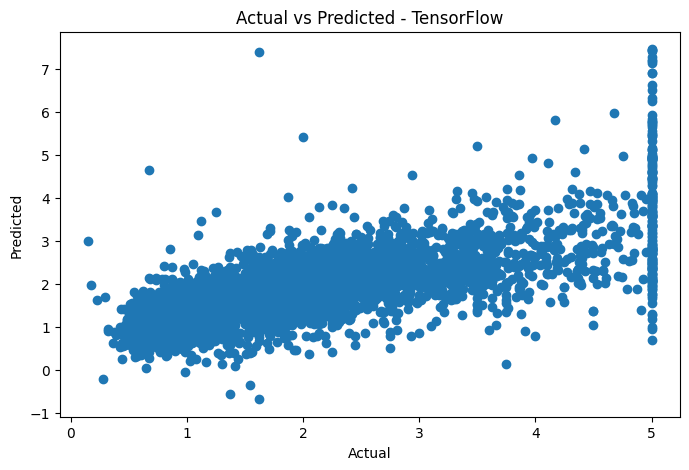

In [15]:
# Plot predictions
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - TensorFlow")
plt.show()